In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
optimized_df = pd.read_csv("optimized.csv")
unoptimized_df = pd.read_csv("unoptimized.csv")

# Read and clean both datasets
optimized_df = pd.read_csv("optimized.csv", sep=';')
unoptimized_df = pd.read_csv("unoptimized.csv", sep=';')

# Strip spaces in column names and values
for df in [optimized_df, unoptimized_df]:
    df.columns = df.columns.str.strip()
    df['tag'] = df['tag'].str.strip()

# Define the path to filter
path_css = "GET /static/frontend/de-DE/styles.css"
path_js = "GET /static/frontend/de-DE/assets/js/pdf.worker.min.mjs"

# Filter both datasets for the same path
opt_css_df = optimized_df[optimized_df['tag'] == path_css].reset_index(drop=True)
unopt_css_df = unoptimized_df[unoptimized_df['tag'] == path_css].reset_index(drop=True)

opt_js_df = optimized_df[optimized_df['tag'] == path_js].reset_index(drop=True)
unopt_js_df = unoptimized_df[unoptimized_df['tag'] == path_js].reset_index(drop=True)




In [6]:
print(unoptimized_df['tag'].unique())



['GET /static/frontend/de-DE/styles.css'
 'GET /static/frontend/de-DE/assets/js/pdf.worker.min.mjs']


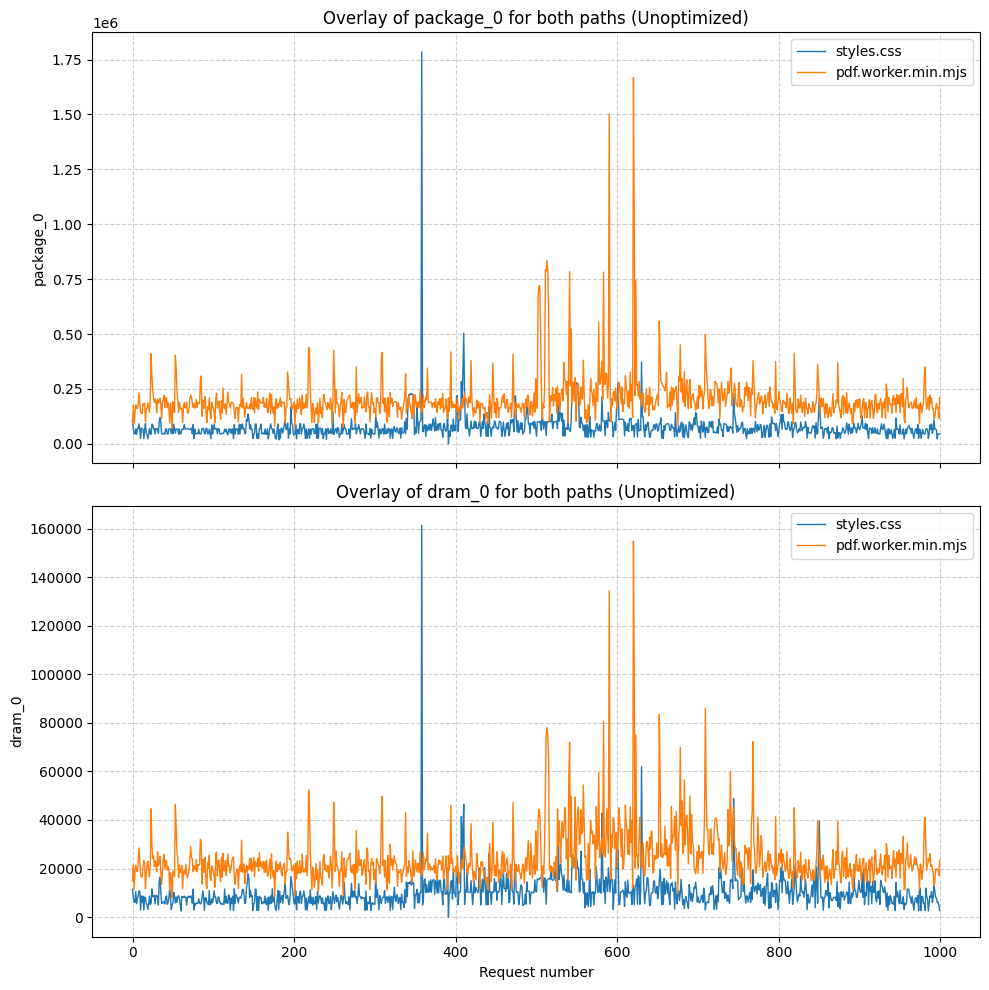

In [28]:


# Create two vertically stacked subplots (top: package_0, bottom: dram_0)
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- Top: package_0 ---
axes[0].plot(css_df.index, css_df['package_0'], label='styles.css', linewidth=1)
axes[0].plot(js_df.index, js_df['package_0'], label='pdf.worker.min.mjs', linewidth=1)
axes[0].set_ylabel("package_0")
axes[0].set_title("Overlay of package_0 for both paths (Unoptimized)")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- Bottom: dram_0 ---
axes[1].plot(css_df.index, css_df['dram_0'], label='styles.css', linewidth=1)
axes[1].plot(js_df.index, js_df['dram_0'], label='pdf.worker.min.mjs', linewidth=1)
axes[1].set_xlabel("Request number")
axes[1].set_ylabel("dram_0")
axes[1].set_title("Overlay of dram_0 for both paths (Unoptimized)")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


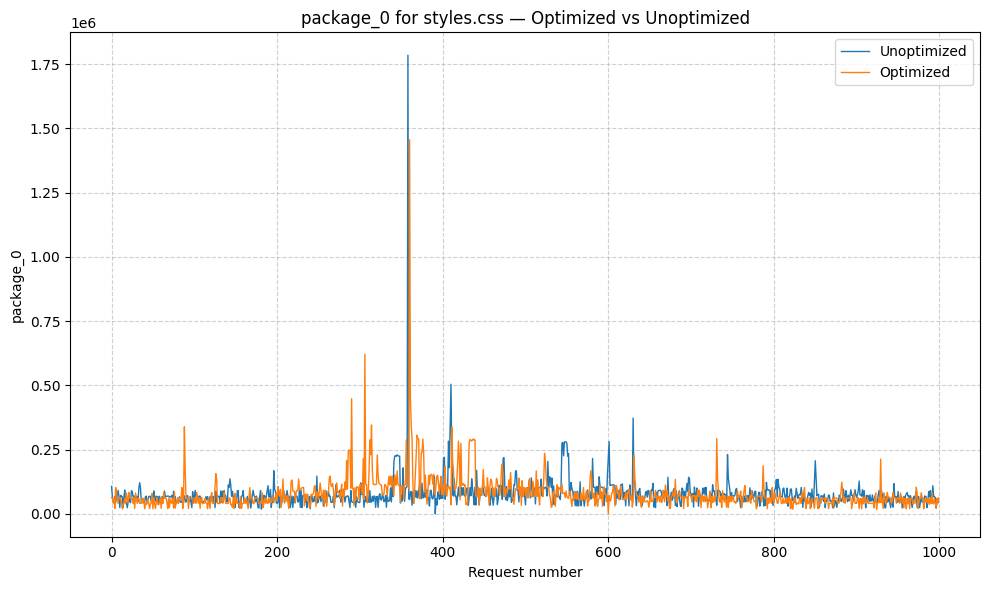

In [13]:


# Plot overlay of optimized vs unoptimized
plt.figure(figsize=(10, 6))
plt.plot(unopt_css_df.index, unopt_css_df['package_0'], label='Unoptimized', linewidth=1)
plt.plot(opt_css_df.index, opt_css_df['package_0'], label='Optimized', linewidth=1)

plt.xlabel("Request number")
plt.ylabel("package_0")
plt.title("package_0 for styles.css — Optimized vs Unoptimized")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


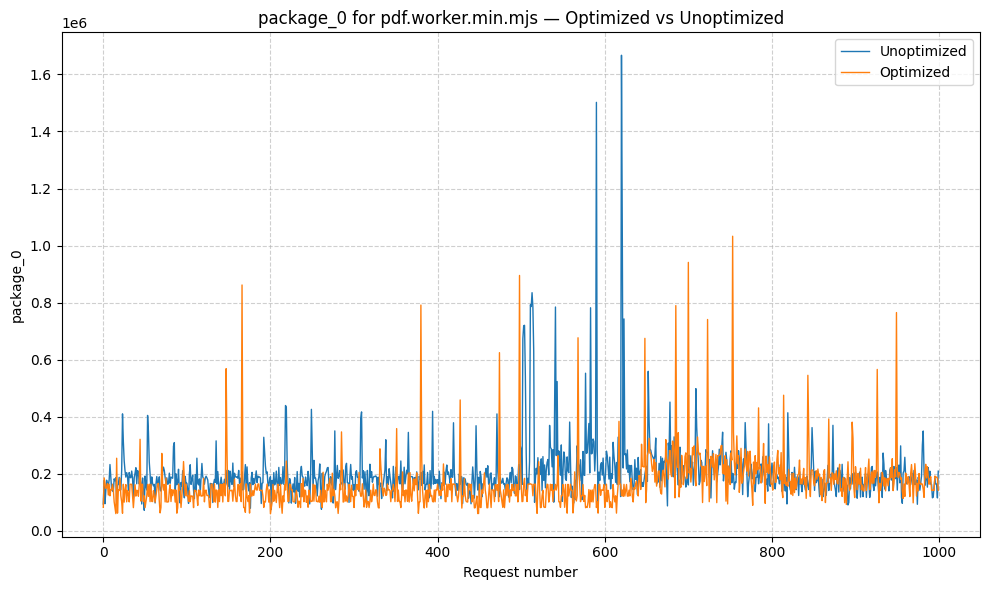

In [17]:
# Plot overlay of optimized vs unoptimized
plt.figure(figsize=(10, 6))
plt.plot(unopt_js_df.index, unopt_js_df['package_0'], label='Unoptimized', linewidth=1)
plt.plot(opt_js_df.index, opt_js_df['package_0'], label='Optimized', linewidth=1)

plt.xlabel("Request number")
plt.ylabel("package_0")
plt.title("package_0 for pdf.worker.min.mjs — Optimized vs Unoptimized")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

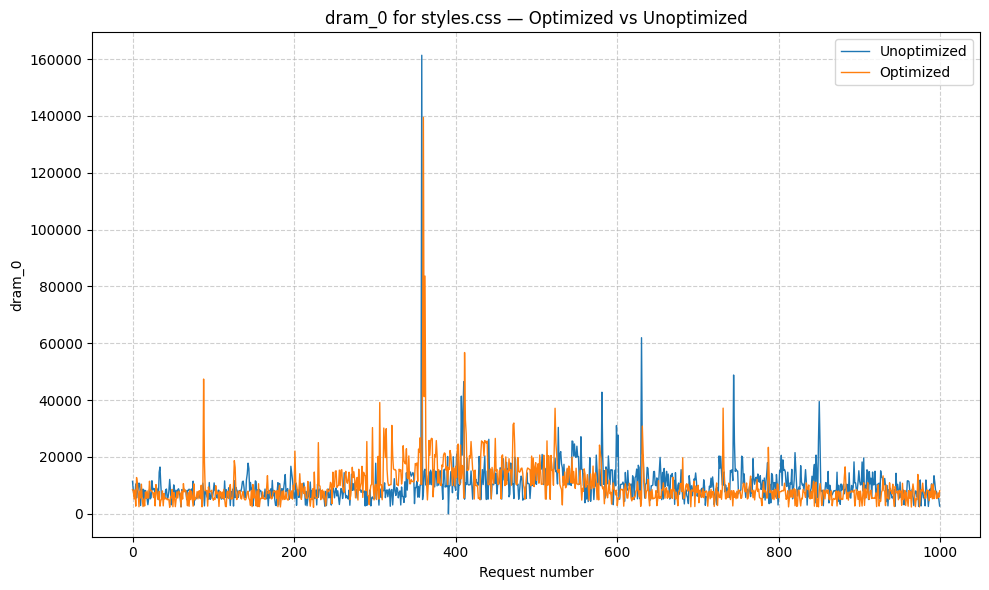

In [18]:
# Plot overlay of optimized vs unoptimized for dram_0 (styles.css)
plt.figure(figsize=(10, 6))
plt.plot(unopt_css_df.index, unopt_css_df['dram_0'], label='Unoptimized', linewidth=1)
plt.plot(opt_css_df.index, opt_css_df['dram_0'], label='Optimized', linewidth=1)

plt.xlabel("Request number")
plt.ylabel("dram_0")
plt.title("dram_0 for styles.css — Optimized vs Unoptimized")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


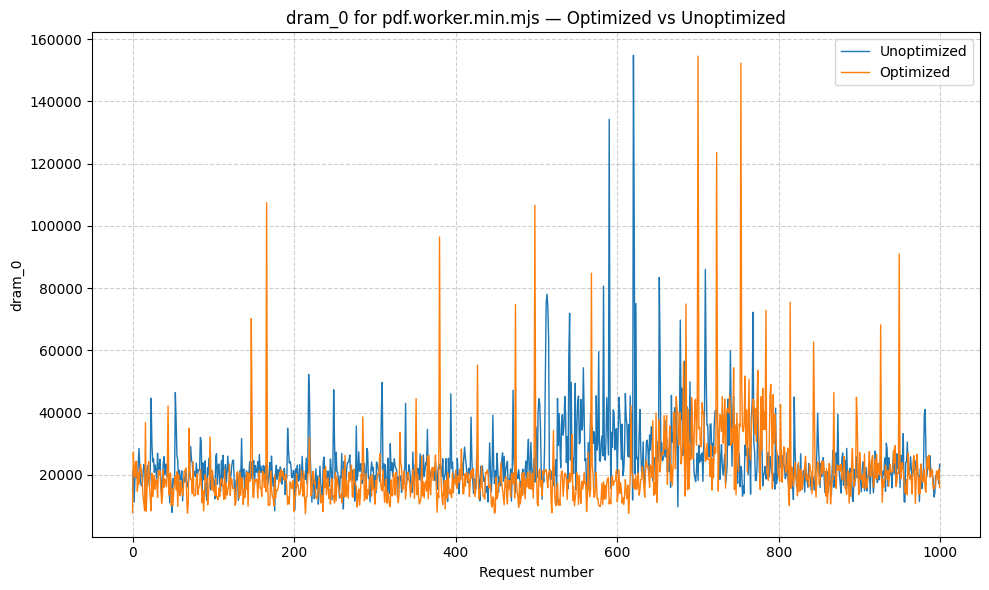

In [20]:
# Plot overlay of optimized vs unoptimized for dram_0
plt.figure(figsize=(10, 6))
plt.plot(unopt_js_df.index, unopt_js_df['dram_0'], label='Unoptimized', linewidth=1)
plt.plot(opt_js_df.index, opt_js_df['dram_0'], label='Optimized', linewidth=1)

plt.xlabel("Request number")
plt.ylabel("dram_0")
plt.title("dram_0 for pdf.worker.min.mjs — Optimized vs Unoptimized")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


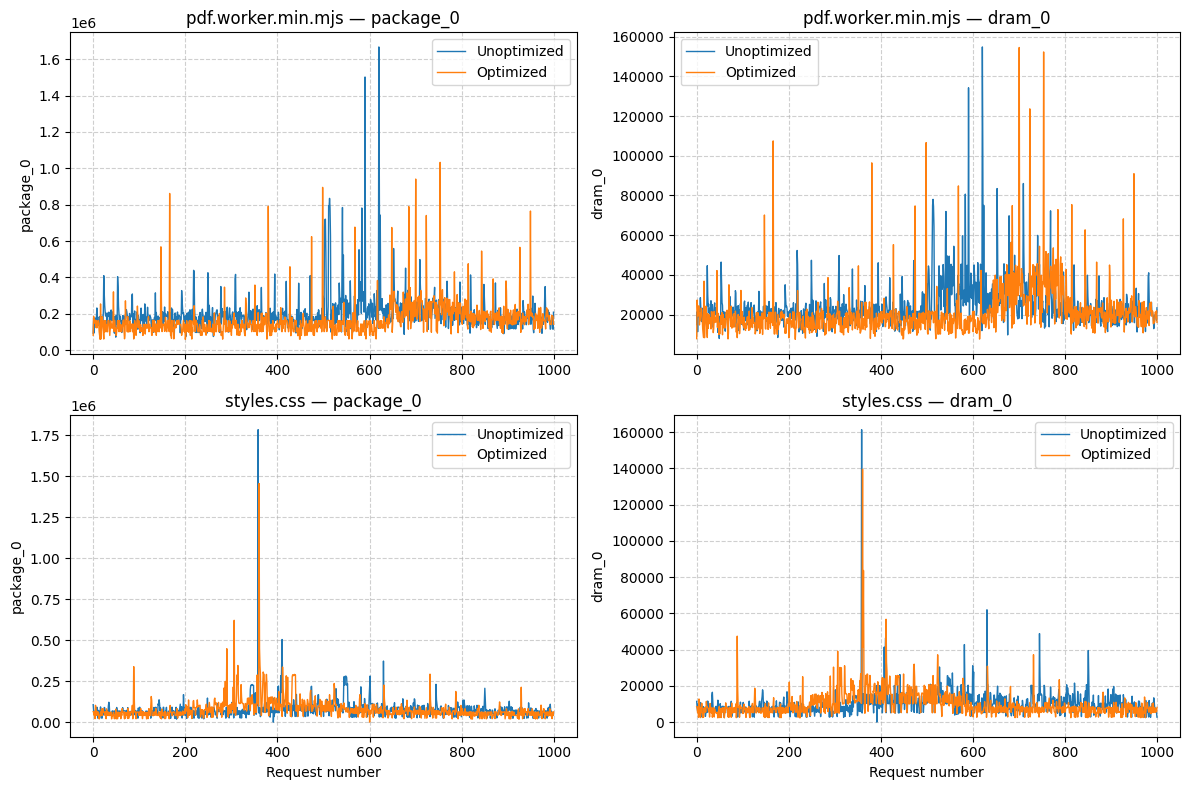

In [27]:


fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

# Row 1: pdf.worker.min.mjs
axes[0, 0].plot(unopt_js_df.index, unopt_js_df['package_0'], label='Unoptimized', linewidth=1)
axes[0, 0].plot(opt_js_df.index, opt_js_df['package_0'], label='Optimized', linewidth=1)
axes[0, 0].set_title("pdf.worker.min.mjs — package_0")
axes[0, 0].set_ylabel("package_0")
axes[0, 0].grid(True, linestyle='--', alpha=0.6)
axes[0, 0].legend()

axes[0, 1].plot(unopt_js_df.index, unopt_js_df['dram_0'], label='Unoptimized', linewidth=1)
axes[0, 1].plot(opt_js_df.index, opt_js_df['dram_0'], label='Optimized', linewidth=1)
axes[0, 1].set_title("pdf.worker.min.mjs — dram_0")
axes[0, 1].set_ylabel("dram_0")
axes[0, 1].grid(True, linestyle='--', alpha=0.6)
axes[0, 1].legend()

# Row 2: styles.css
axes[1, 0].plot(unopt_css_df.index, unopt_css_df['package_0'], label='Unoptimized', linewidth=1)
axes[1, 0].plot(opt_css_df.index, opt_css_df['package_0'], label='Optimized', linewidth=1)
axes[1, 0].set_title("styles.css — package_0")
axes[1, 0].set_xlabel("Request number")
axes[1, 0].set_ylabel("package_0")
axes[1, 0].grid(True, linestyle='--', alpha=0.6)
axes[1, 0].legend()

axes[1, 1].plot(unopt_css_df.index, unopt_css_df['dram_0'], label='Unoptimized', linewidth=1)
axes[1, 1].plot(opt_css_df.index, opt_css_df['dram_0'], label='Optimized', linewidth=1)
axes[1, 1].set_title("styles.css — dram_0")
axes[1, 1].set_xlabel("Request number")
axes[1, 1].set_ylabel("dram_0")
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
axes[1, 1].legend()

plt.tight_layout()
plt.show()
